In [1]:
import sys

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Задание 1: работа с цветовым пространством HSV.
На практике познакомились с преимуществами использования пространства HSV. Если кратко, то с помощью этой модели легче описывать цвет, который мы хотим получить. Поскольку здесь мы оперируем понятиями H = Hue = оттенок, S = Saturation = насыщенность, V = Value = яркость.
Используя модель HSV попробуйте еще раз выполнить задание по превращению "starry_night" в "starry_day" (из дз №1)

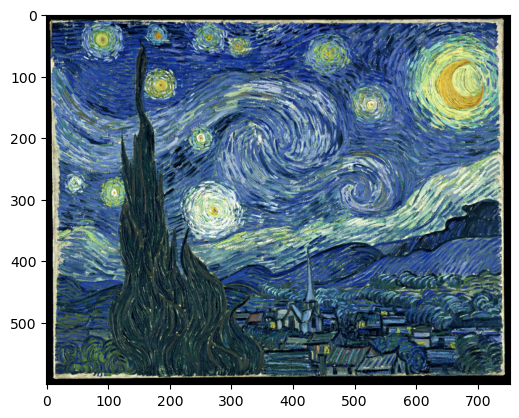

In [10]:
img = cv.imread("../../lab1/hw/starry_night.jpg")

def bgr_to_rgb(image):
    new_img = np.empty_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_img[i][j] = img[i][j][::-1]
    return new_img

img = bgr_to_rgb(img)
plt.imshow(img)
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

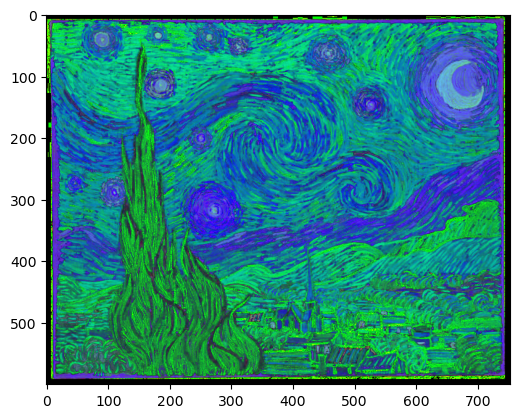

In [11]:
plt.imshow(hsv_img)

In [17]:
def increase_brightness_hsv(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            buf = np.copy(image[i][j])
            buf[0] += (buf[0] + 50) % 255
            buf[1] += (buf[1] + 50) % 255
            image[i][j] = buf
    return image

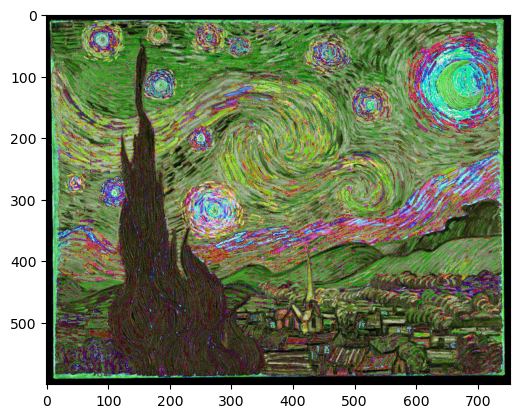

In [18]:
rgb = cv.cvtColor(increase_brightness_hsv(hsv_img), cv.COLOR_HSV2BGR)

plt.imshow(rgb)

Задание 2: На занятии мы разобрали несколько подходов для того, чтобы "размыть" изображение. Для этого мы использовали фильтры, представленные различными матрицами (ядрами). Вопрос - как нам решить обратную задачу? Т.е., имея размытое изображение, как сделать его более четким? Попробуйте подобрать матрицу, которая может это сделать.

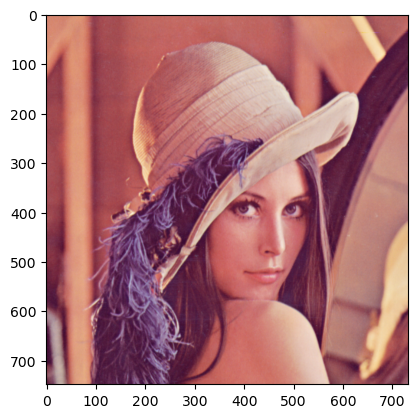

In [19]:
img = cv.imread("woman.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

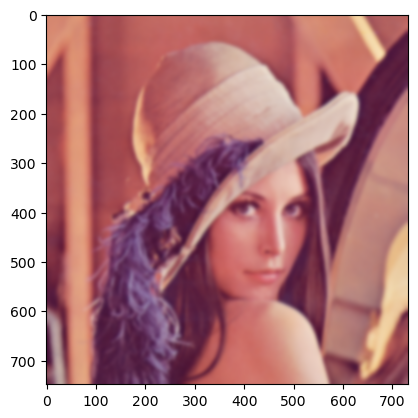

In [20]:
img_res = cv.GaussianBlur(img, (21, 21), 0)
plt.imshow(img_res)

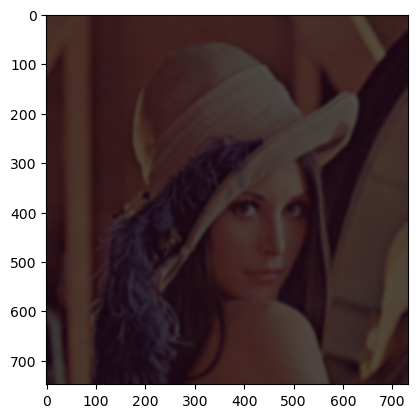

In [29]:
#kernel = np.array([[-0, -1, -0], [-1, 5, -1], [-0, -1, -0]])
kernel = 1/3 * np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img_res_2 = cv.filter2D(img_res, -1, kernel)
plt.imshow(img_res_2)